In [1]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

from sqlalchemy import create_engine, MetaData # database connection
import numpy as np
import pandas as pd
import datetime as dt

# DB = {
#     'drivername': 'mysql',
#     'servername': '192.185.128.28', #dynamic server. Will change 
#     'port': '3306',
#     'username': 'thogativ_ab',
#     'password': 'Arun!23',
#     'database': 'thogativ_sthali',
# #     'driver': 'SQL Server Native Client 11.0',
#     'trusted_connection': 'yes',  
#     'legacy_schema_aliasing': False
# }
DB = {
    'drivername': 'mysql',
    'servername': 'localhost', #dynamic server. Will change 
    'port': '3306',
    'username': 'root',
    'password': 'root',
    'database': 'stocks',
#     'driver': 'SQL Server Native Client 11.0',
    'trusted_connection': 'yes',  
    'legacy_schema_aliasing': False
}

db_engine = create_engine(DB['drivername'] + '://' + DB['username'] +':'+ DB['password'] +
                       '@'+ DB['servername'] +':'+ DB['port']+ '/' + DB['database']+'?charset=utf8', encoding="utf-8")  
# df.read_sql('nse', db_engine, if_exists='append', index=False )

Populating the interactive namespace from numpy and matplotlib


In [2]:

dtthen=dt.datetime.now()
# stock_data=pd.read_sql_query('SELECT OPEN FROM nse where SYMBOL="ACC" ORDER BY TIMESTAMP', db_engine)
stock_data=pd.read_sql_query('SELECT * FROM `nse` WHERE 1', db_engine)
print(dt.datetime.now()-dtthen)
stock_data.head(4)

0:01:42.600949


,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,ABB,EQ,715.0,715.0,715.0,715.00,715.0,0.0,100,71500.0,1994-11-03,NaN,None
1,ACC,EQ,4500.0,4660.0,4500.0,4636.75,4625.0,0.0,210,955350.0,1994-11-03,NaN,None
2,AHMEDELEC,EQ,62.0,62.0,62.0,62.00,62.0,0.0,100,6200.0,1994-11-03,NaN,None
3,ALFALAVAL,EQ,425.0,425.0,425.0,425.00,425.0,0.0,100,42500.0,1994-11-03,NaN,None


In [3]:
dtthen=dt.datetime.now()
stock_data=stock_data.set_index('TIMESTAMP')
temp_data=stock_data[stock_data.SYMBOL == 'ABB'] 
# stock_data=stock_data.set_index('TIMESTAMP')
# # stock_data.index
print(dt.datetime.now()-dtthen)
temp_data.tail(4)

0:00:01.417240


,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN
TIMESTAMP,,,,,,,,,,,,
2018-03-08,ABB,EQ,1449.85,1449.85,1420.05,1425.75,1423.8,1435.55,24570,3.518495e+07,2193.0,INE117A01022
2018-03-09,ABB,EQ,1432.00,1450.40,1431.00,1437.70,1438.0,1425.75,157434,2.266774e+08,3893.0,INE117A01022
2018-03-12,ABB,EQ,1449.80,1450.00,1423.60,1433.60,1429.8,1437.70,16143,2.319558e+07,1537.0,INE117A01022
2018-03-13,ABB,EQ,1438.60,1439.85,1402.00,1410.80,1409.5,1433.60,38286,5.437253e+07,4278.0,INE117A01022


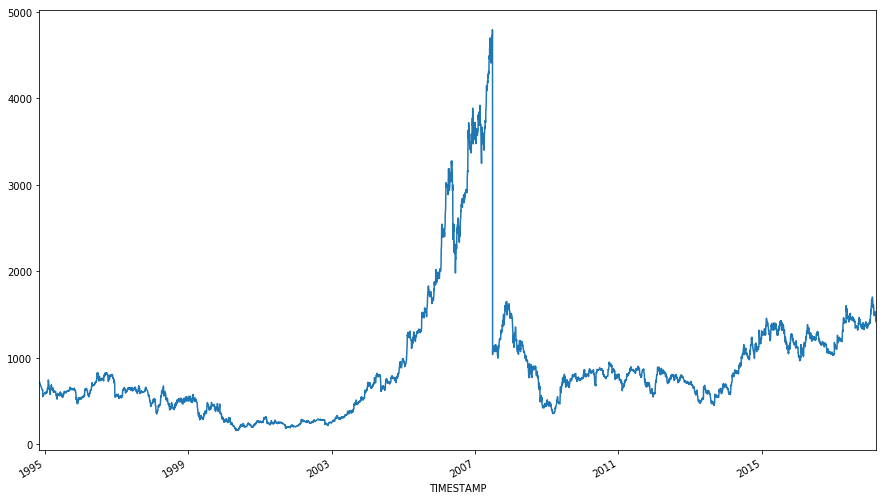

In [7]:
# data=stock_data["CLOSE"].iloc[-100:]
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

 
temp_data["CLOSE"].iloc[:].plot() # Plot the adjusted closing price of AAPL

In [8]:
temp_data.to_csv("abb.csv")

In [9]:
# transdat = temp_data.loc[1:700,["OPEN", "HIGH", "LOW", "CLOSE"]]
# transdat
temp_data=stock_data[stock_data.SYMBOL == 'ABB'] 
temp_data=temp_data.rename(columns={"OPEN": "Open", "HIGH": "High", "LOW": "Low", "CLOSE": "Close", "TIMESTAMP": "Date"})
# temp_data.head(400)

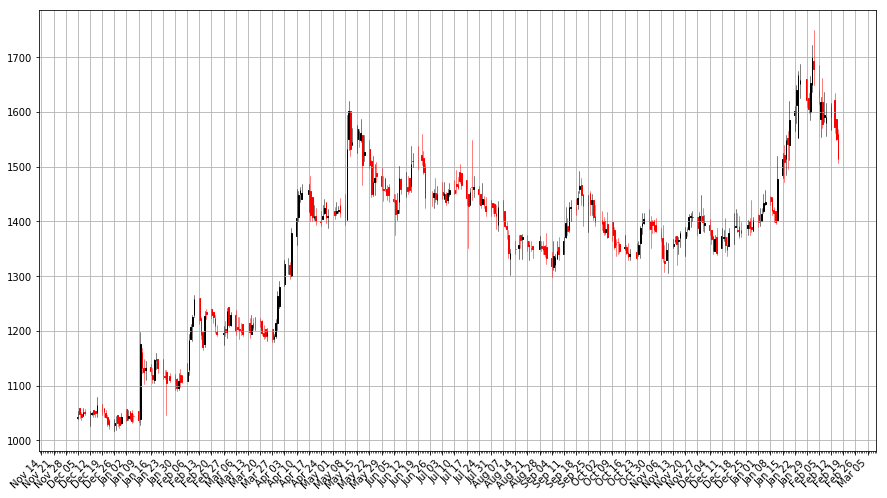

In [11]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
#     transdat = dat.loc[:,["OPEN", "HIGH", "LOW", "CLOSE"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(temp_data.tail(300))
# 

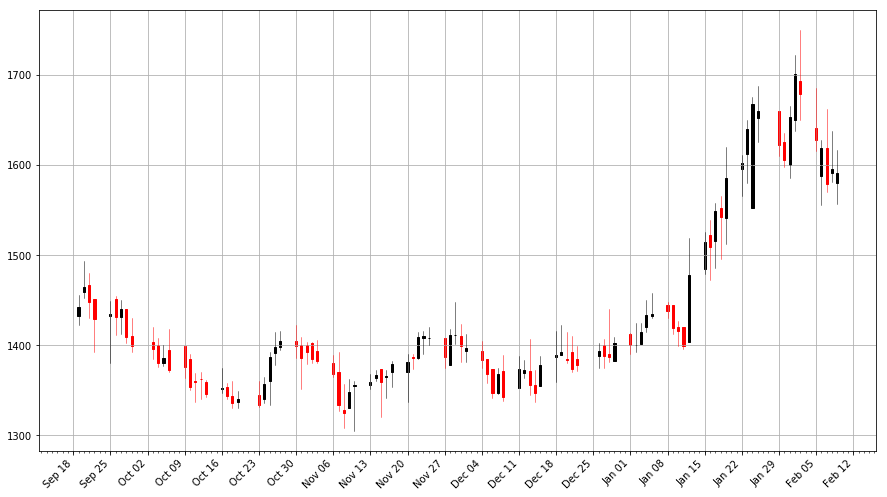

In [121]:
pandas_candlestick_ohlc(temp_data.tail(100))

2018-02-09 00:00:00
<class 'str'>


(None, None)

In [109]:
# stock_data['TIMESTAMP'].iloc[1:10]
stock_data.index

DatetimeIndex(['1994-11-03', '1994-11-03', '1994-11-03', '1994-11-03',
               '1994-11-03', '1994-11-03', '1994-11-03', '1994-11-03',
               '1994-11-03', '1994-11-03',
               ...
               '2018-02-09', '2018-02-09', '2018-02-09', '2018-02-09',
               '2018-02-09', '2018-02-09', '2018-02-09', '2018-02-09',
               '2018-02-09', '2018-02-09'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=6772999, freq=None)